# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +61.40435250020                   -2.50    6.88s
  2   +55.17124071473        0.79       -1.36   10.3ms
  3   +39.98639768841        1.18       -0.98   13.3ms
  4   +30.44458490778        0.98       -0.83   13.4ms
  5   +27.98346007984        0.39       -0.74   11.4ms
  6   +13.05546804366        1.17       -0.68   35.6ms
  7   +8.743315388651        0.63       -0.74   10.2ms
  8   +7.790665927213       -0.02       -0.72   9.92ms
  9   +7.197710008453       -0.23       -0.65   9.80ms
 10   +6.718287563972       -0.32       -0.67   8.18ms
 11   +6.309019566715       -0.39       -0.70   8.14ms
 12   +5.994356719943       -0.50       -0.70   8.06ms
 13   +5.842988327664       -0.82       -0.79   8.08ms
 14   +5.745172033427       -1.01       -0.75   7.95ms
 15   +5.664382399741       -1.09       -0.77   12.2ms
 16   +5.570537136111       -1.03       -0.80   29.5ms
 17   +5.54

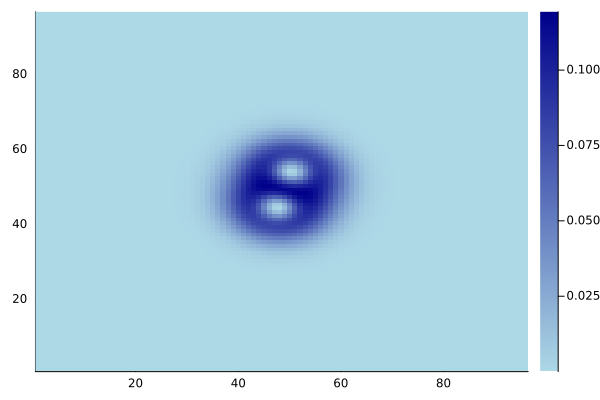

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)